<a href="https://colab.research.google.com/github/ranaehelal/bias-detection-NU/blob/main/bias_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Basic information about the dataset

## load the data

In [63]:
df =pd.read_csv('data.csv')

## EDA

In [64]:
print(df.head())

   Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0   26       1               2                0                  3   
1   39       1               4               12                  3   
2   48       0               2                3                  2   
3   34       1               2                5                  2   
4   30       0               1                6                  1   

   DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0            26.783828              48          78                91   
1            25.862694              35          68                80   
2             9.920805              20          67                13   
3             6.407751              36          27                70   
4            43.105343              23          52                85   

   RecruitmentStrategy  HiringDecision  
0                    1               1  
1                    2               1  
2                    2 

In [65]:
print(df.describe())

               Age       Gender  EducationLevel  ExperienceYears  \
count  1500.000000  1500.000000     1500.000000      1500.000000   
mean     35.148667     0.492000        2.188000         7.694000   
std       9.252728     0.500103        0.862449         4.641414   
min      20.000000     0.000000        1.000000         0.000000   
25%      27.000000     0.000000        2.000000         4.000000   
50%      35.000000     0.000000        2.000000         8.000000   
75%      43.000000     1.000000        3.000000        12.000000   
max      50.000000     1.000000        4.000000        15.000000   

       PreviousCompanies  DistanceFromCompany  InterviewScore   SkillScore  \
count         1500.00000          1500.000000     1500.000000  1500.000000   
mean             3.00200            25.505379       50.564000    51.116000   
std              1.41067            14.567151       28.626215    29.353563   
min              1.00000             1.031376        0.000000     0.000000 

In [66]:
print(df['Gender'].value_counts())

Gender
0    762
1    738
Name: count, dtype: int64


In [67]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB
None


In [68]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Data types
print("\nData types:\n", df.dtypes)

Missing values:
 Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

Data types:
 Age                      int64
Gender                   int64
EducationLevel           int64
ExperienceYears          int64
PreviousCompanies        int64
DistanceFromCompany    float64
InterviewScore           int64
SkillScore               int64
PersonalityScore         int64
RecruitmentStrategy      int64
HiringDecision           int64
dtype: object


## visual

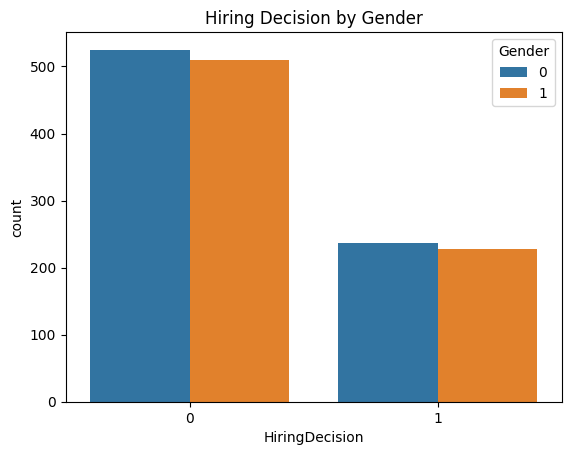

In [69]:
sns.countplot(data=df, x='HiringDecision', hue='Gender')
plt.title('Hiring Decision by Gender')
plt.show()

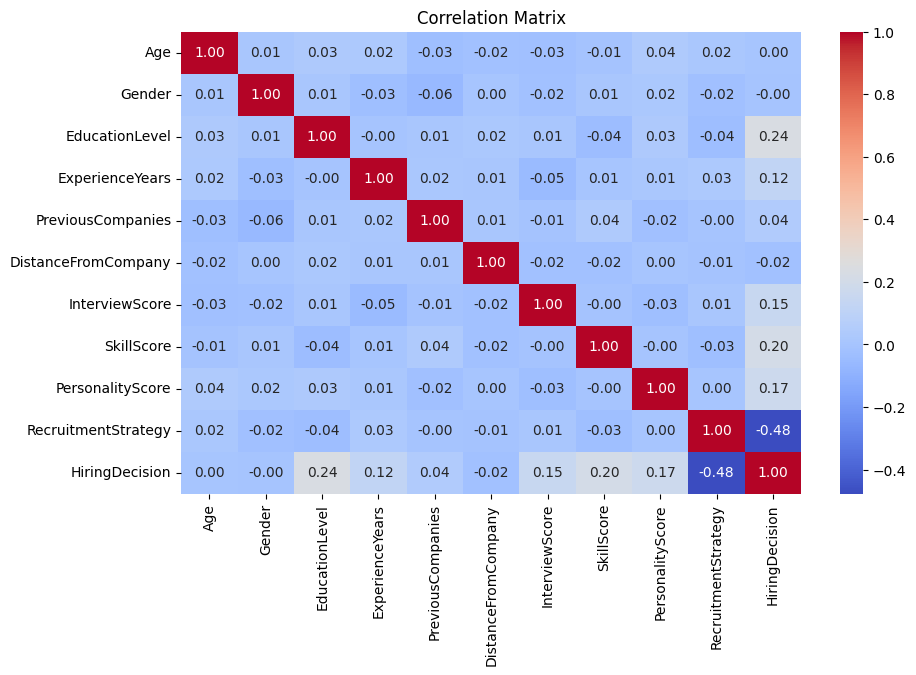

In [70]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

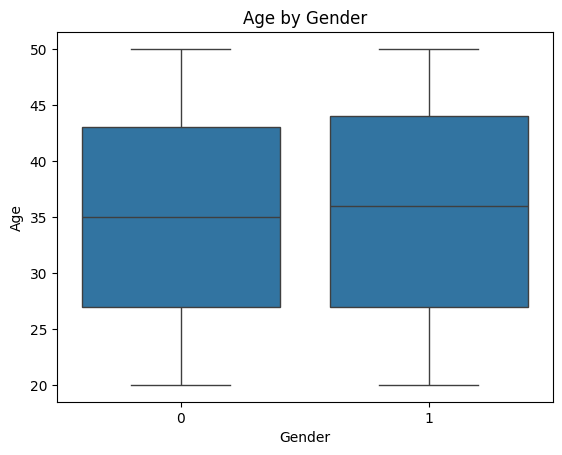

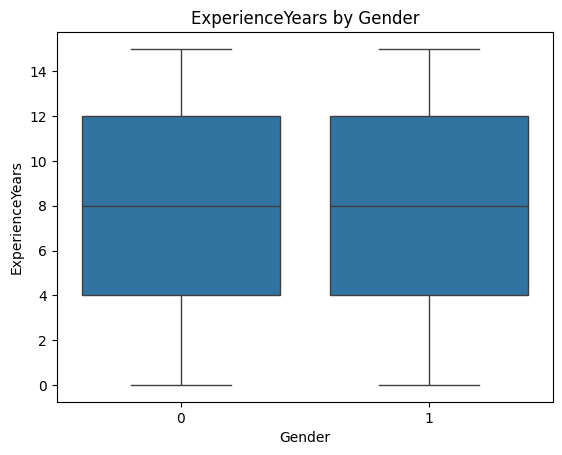

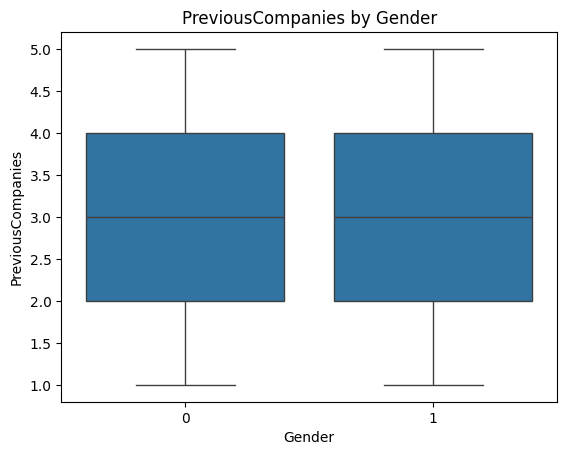

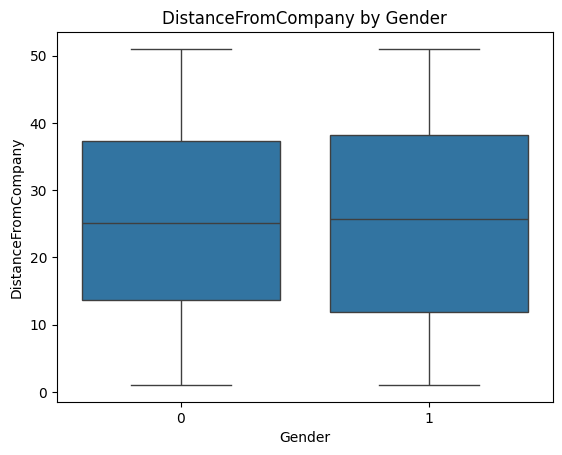

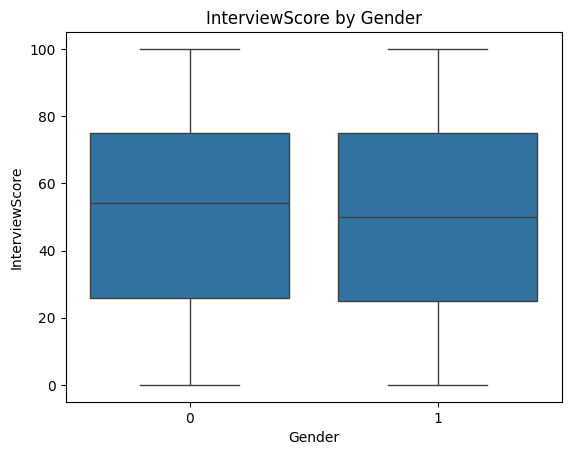

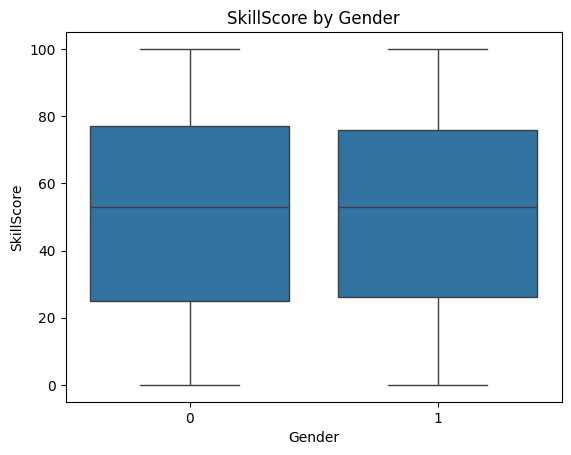

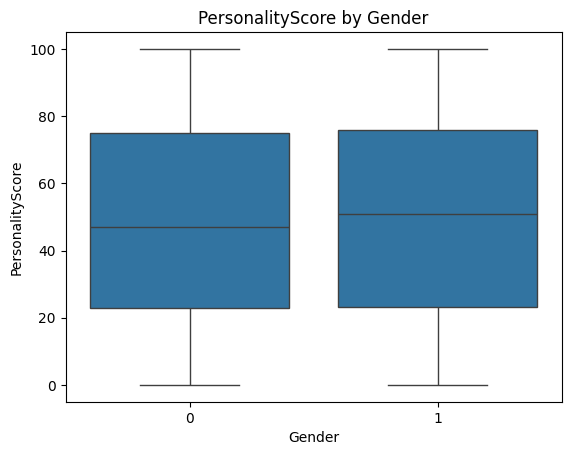

In [71]:
# Boxplot of scores by Gender
score_columns = ['Age', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany',
                  'InterviewScore', 'SkillScore', 'PersonalityScore']

for col in score_columns:
    sns.boxplot(x='Gender', y=col, data=df)
    plt.title(f'{col} by Gender')
    plt.show()

#  Train/Test Split with Forced Imbalance


In [72]:
# divide to create imbalance then concat
df_male = df[df['Gender'] == 1]
df_female = df[df['Gender'] == 0]

In [73]:

train_male, test_male = train_test_split(df_male, test_size=0.3, random_state=42)
train_female, test_female = train_test_split(df_female, test_size=0.3, random_state=42)

In [74]:
# Reduce female representation in training (e.g., 30%)
train_female = train_female.sample(frac=0.3, random_state=42)

train_data = pd.concat([train_male, train_female])
test_data = pd.concat([test_male, test_female])

X_train = train_data.drop('HiringDecision', axis=1)
y_train = train_data['HiringDecision']

X_test = test_data.drop('HiringDecision', axis=1)
y_test = test_data['HiringDecision']

In [75]:
# Ensure consistent columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [76]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Age', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany',
                  'InterviewScore', 'SkillScore', 'PersonalityScore']

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

preds = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

Accuracy: 0.8470066518847007
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       307
           1       0.78      0.72      0.75       144

    accuracy                           0.85       451
   macro avg       0.83      0.81      0.82       451
weighted avg       0.84      0.85      0.85       451



In [78]:
!pip install fairlearn

# Bias Metrics with Fairlearn

In [79]:
from fairlearn.metrics import MetricFrame, demographic_parity_difference, equalized_odds_difference

# sensitive feature
sensitive = X_test['Gender']

# Group fairness metrics
mf = MetricFrame(metrics=accuracy_score,
                 y_true=y_test,
                 y_pred=preds,
                 sensitive_features=sensitive)

print("Accuracy by Gender:")
print(mf.by_group)




Accuracy by Gender:
Gender
0    0.834061
1    0.860360
Name: accuracy_score, dtype: float64


# Explainability with SHAP


 SHAP explanation for sample #1 (Index: 1074):


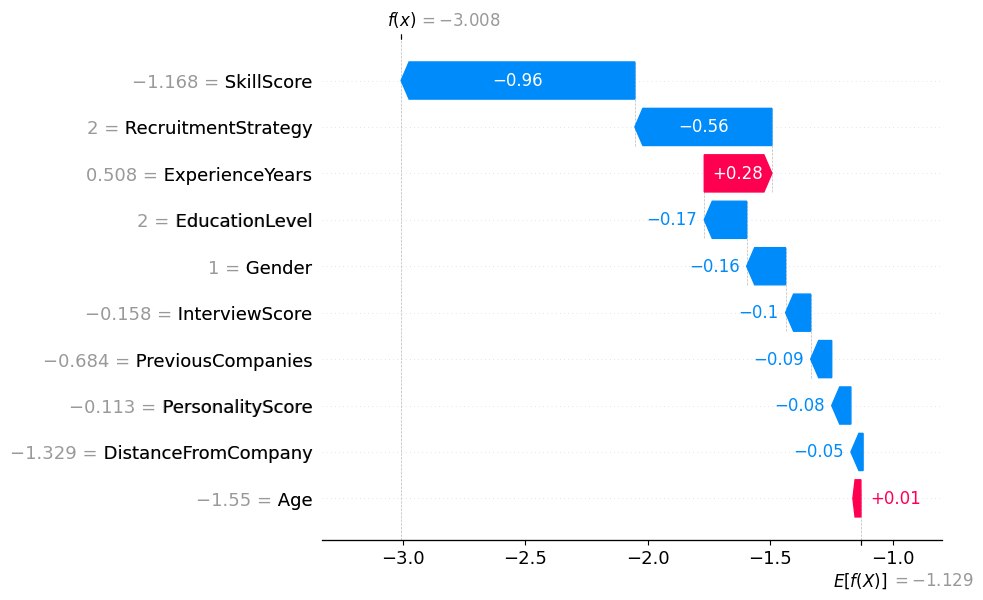


 SHAP explanation for sample #2 (Index: 519):


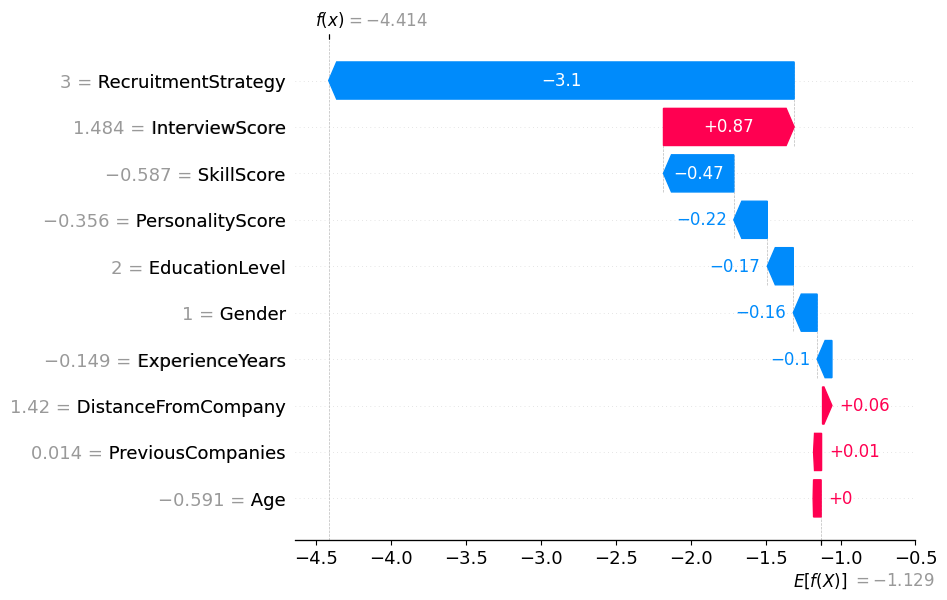


 SHAP explanation for sample #3 (Index: 991):


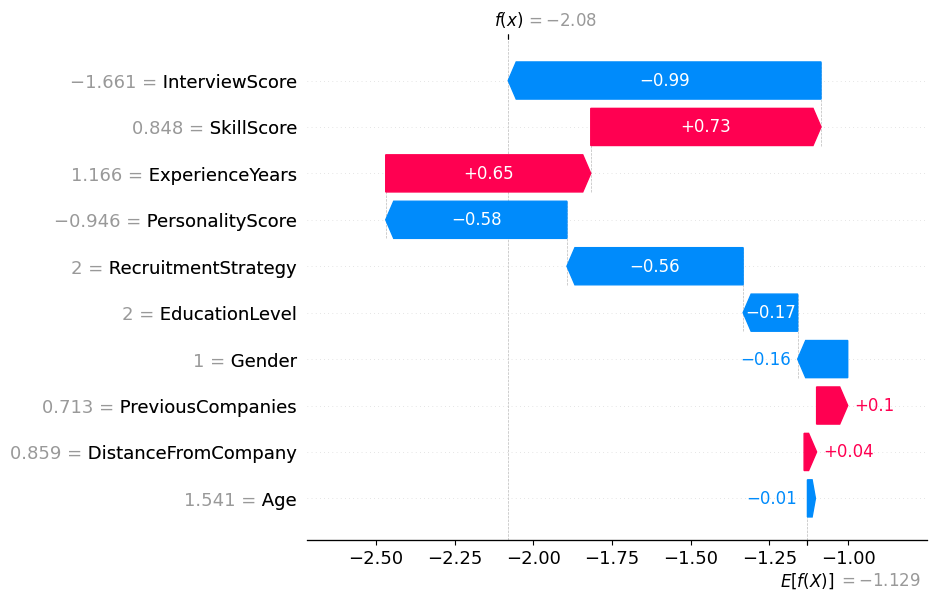


 SHAP explanation for sample #4 (Index: 610):


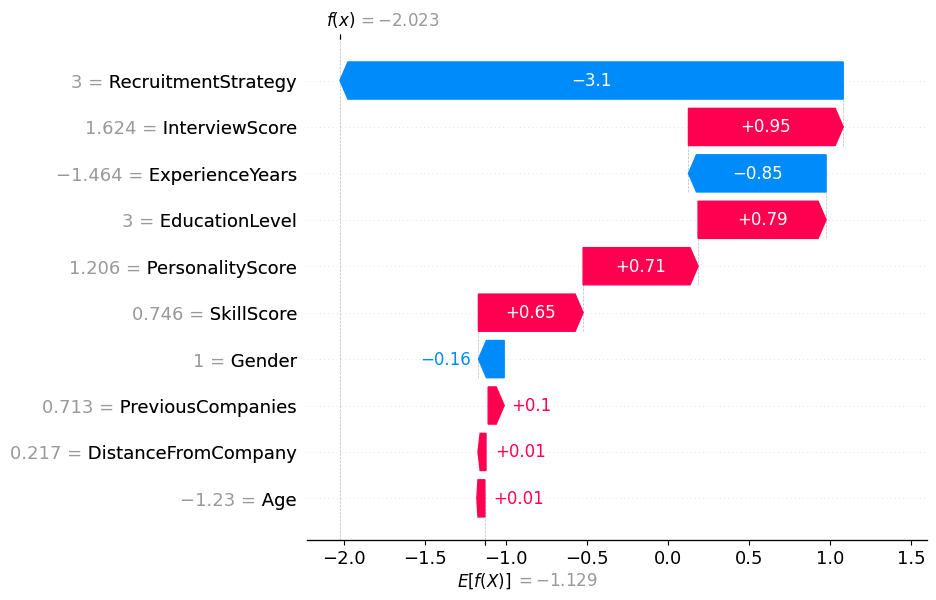


 SHAP explanation for sample #5 (Index: 702):


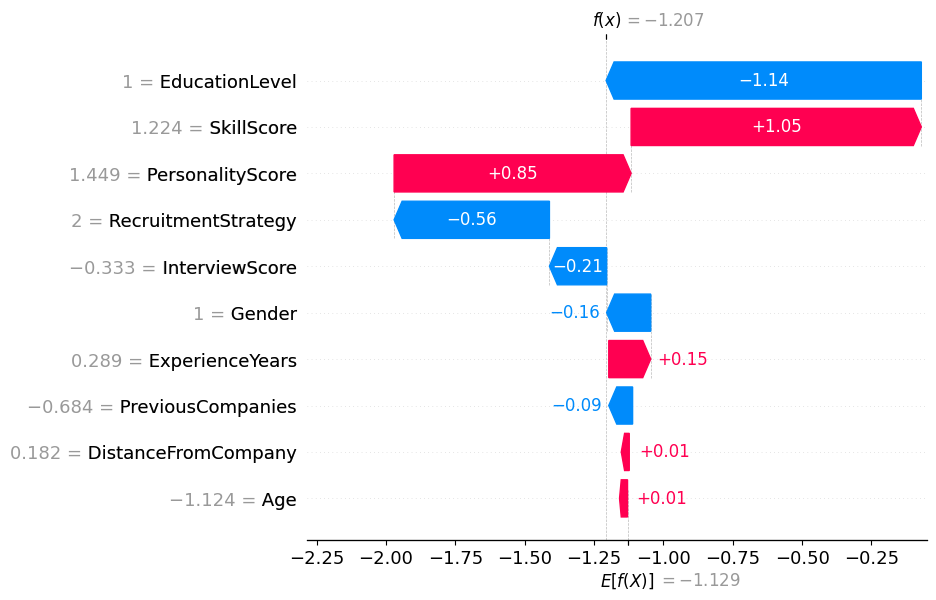

In [80]:
import shap
import sklearn

explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

# Pick 5 examples (3 hire, 2 not)
hire_rows = test_data[test_data['HiringDecision']==1].iloc[:3]
nohire_rows = test_data[test_data['HiringDecision']==0].iloc[:2]
selected_rows = pd.concat([hire_rows, nohire_rows])

for i in range(len(selected_rows)):
    print(f"\n SHAP explanation for sample #{i+1} (Index: {selected_rows.index[i]}):")
    shap.plots.waterfall(shap_values[selected_rows.index.get_loc(selected_rows.index[i])])

 # Bias Mitigation (Reweighing Example)

In [81]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from sklearn.linear_model import LogisticRegression

mitigator = ExponentiatedGradient(LogisticRegression(), constraints=DemographicParity())
mitigator.fit(X_train, y_train, sensitive_features=X_train['Gender'])

mitigated_preds = mitigator.predict(X_test)

# Evaluate fairness again
dp_mitigated = demographic_parity_difference(
    y_true=y_test,
    y_pred=mitigated_preds,
    sensitive_features=sensitive
)
acc_mitigated = accuracy_score(y_test, mitigated_preds)

print("Mitigated Accuracy:", acc_mitigated)
print("Mitigated Demographic Parity:", dp_mitigated)



Mitigated Accuracy: 0.8603104212860311
Mitigated Demographic Parity: 0.0926078917345293
